# **K-nearest neighbour (KNN)**, it can have many classes but during visualisation 2-classes only as we have only 2Dplane.
###(1) Choose a number K of neighbours, most preffered is 5(default).
### (2) Take the K nearest neighbours of the new data-point, according to the Euclidean distance(most-prefferd), can also take manhattanDistance .
### (3) Among those K, count the number of data points in each category.
### (4) Assign the new data point to the category where you counted the most neighbours
### Euclidean Distance: ((x2-x1)^2 + (y2-y1)^2)^(-1/2) ,more defined in the slide
## **KNN is a non-linear classifier, which uses nonLinear line for classifying the categories**

In [2]:
 #Imoprting Libraries
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd

In [3]:
#Importing Datasets
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [4]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

## Importing and training the model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
#Metric provide various algo for distance calculation and p=2, defines for using EuclideanDisatnce, p=1 defins for manhattan
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

## Predicting the new results

In [7]:
print(classifier.predict(sc_x.transform([[30,87000]])))

[0]


##Predicting the Testing datapoints

In [8]:
Y_pred=classifier.predict(X_test)

##Comparing the result with Ogs

In [9]:
#Would provide the result in 2d-manner in same matrix in which eneites have thier own column
print(np.column_stack((Y_pred,Y_test)))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


## Making Confusion Matrix for getting the info about how much correct and incorrect_prediction is there

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

# 54 correct prediction of class "0" and 21 correct prediction of class "1"
# 1 incorrect prediction of class "0" and 4 incoorect prediction class "1"

[[54  4]
 [ 1 21]]


## Checking Accuracy Score

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.9375


## Visualising the results for training datapoints

<ipython-input-13-3caf4246ed82>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


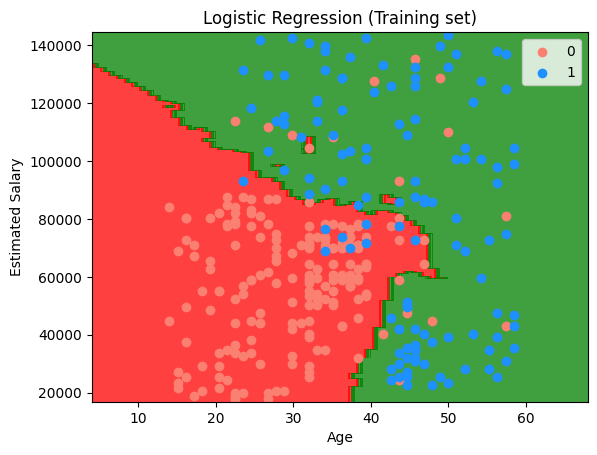

In [13]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_train),Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the results for testing datapoints

<ipython-input-14-341a84bcc046>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


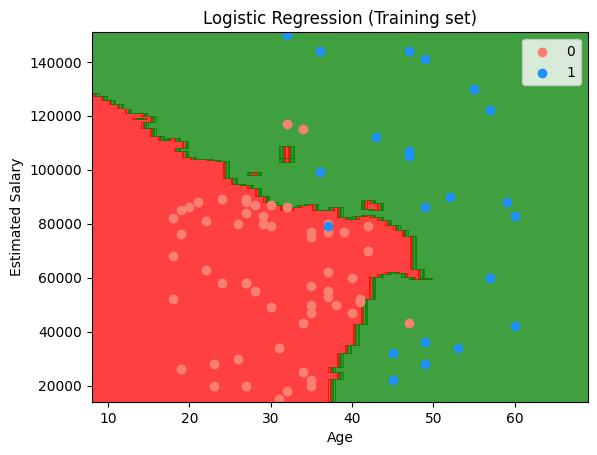

In [14]:
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_test),Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **Hence KNN is a nonLinear classifier which uses nonLinear line for differentiating the classes and are more reliable and accurate to classify tham than Logistic Regression**